# Data Analysis and Pre-Processing

In [1]:
# Import Libraries
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from ydata_profiling import ProfileReport

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings


# Ignore warnings
warnings.filterwarnings("ignore")

# Defining the seed
RANDOM_STATE = 42

In [2]:
# Loading the data set
# Heart Attack Analysis & Prediction Dataset
# https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset
df = pd.read_csv('../Heart_Attack/heart.csv')
df.head() # Displaying the first rows of the DataFrame

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


- **cp:** Chest Pain type chest pain type;

    - Value 1: typical angina;
    - Value 2: atypical angina;
    - Value 3: non-anginal pain;
    - Value 4: asymptomatic.

- **trtbps:** resting blood pressure (in mm Hg);
- **chol:** cholestoral in mg/dl fetched via BMI sensor;
- **fbs:** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false);
- **rest_ecg:** resting electrocardiographic results;

    - Value 0: normal;
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV);
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria.

- **thalach:** maximum heart rate achieved;

- **exng:** exercise induced angina (1 = yes; 0 = no);

- **caa:** number of major vessels (0-3);

- **thall:** Thalium Stress Test result (0,3);

- **target:** 0 = less chance of heart attack 1 = more chance of heart attack.

In [4]:
# Renaming the columns for easier understanding
df = df.rename(columns={'cp':'chest_pain', 'trtbps':'resting_blood_pressure', 'chol':'cholestoral',
                        'fbs':'fasting_blood_sugar', 'restecg':'electrocardiographic',
                        'thalachh':'maximum_heart_rate_achieved', 'oldpeak':'previous_peak',
                        'exng':'exercise_induced_angina', 'caa':'number_of_major_vessels',
                        'slp':'slope', 'thall':'thalium_stress_test_result'})
df.head()

,age,sex,chest_pain,resting_blood_pressure,cholestoral,fasting_blood_sugar,electrocardiographic,maximum_heart_rate_achieved,exercise_induced_angina,previous_peak,slope,number_of_major_vessels,thalium_stress_test_result,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Análise dos Dados

In [5]:
# DataFrame size (rows and columns)
df.shape

(303, 14)

In [6]:
# DataFrame Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          303 non-null    int64  
 1   sex                          303 non-null    int64  
 2   chest_pain                   303 non-null    int64  
 3   resting_blood_pressure       303 non-null    int64  
 4   cholestoral                  303 non-null    int64  
 5   fasting_blood_sugar          303 non-null    int64  
 6   electrocardiographic         303 non-null    int64  
 7   maximum_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina      303 non-null    int64  
 9   previous_peak                303 non-null    float64
 10  slope                        303 non-null    int64  
 11  number_of_major_vessels      303 non-null    int64  
 12  thalium_stress_test_result   303 non-null    int64  
 13  output              

In [7]:
# Checking for null data
df.isnull().sum()

age                            0
sex                            0
chest_pain                     0
resting_blood_pressure         0
cholestoral                    0
fasting_blood_sugar            0
electrocardiographic           0
maximum_heart_rate_achieved    0
exercise_induced_angina        0
previous_peak                  0
slope                          0
number_of_major_vessels        0
thalium_stress_test_result     0
output                         0
dtype: int64

In [8]:
# Generating descriptive statistics
df.describe()

,age,sex,chest_pain,resting_blood_pressure,cholestoral,fasting_blood_sugar,electrocardiographic,maximum_heart_rate_achieved,exercise_induced_angina,previous_peak,slope,number_of_major_vessels,thalium_stress_test_result,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# Sorting the DataFrame by Column 'age'
df.sort_values(by=['age'], ascending=True)

,age,sex,chest_pain,resting_blood_pressure,cholestoral,fasting_blood_sugar,electrocardiographic,maximum_heart_rate_achieved,exercise_induced_angina,previous_peak,slope,number_of_major_vessels,thalium_stress_test_result,output
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3,0
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1


In [10]:
# Correlation matrix
df.corr()

,age,sex,chest_pain,resting_blood_pressure,cholestoral,fasting_blood_sugar,electrocardiographic,maximum_heart_rate_achieved,exercise_induced_angina,previous_peak,slope,number_of_major_vessels,thalium_stress_test_result,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
resting_blood_pressure,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholestoral,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
electrocardiographic,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
maximum_heart_rate_achieved,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exercise_induced_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
previous_peak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


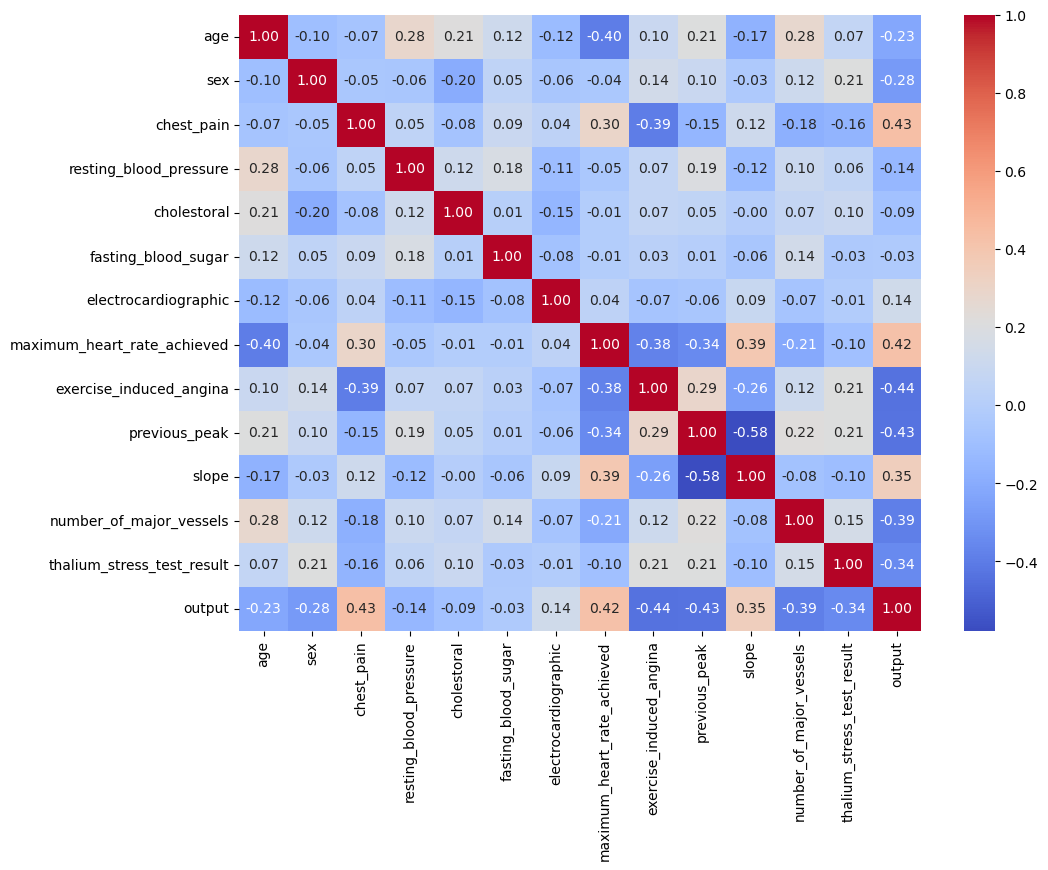

In [11]:
# Calculating Pearson Correlation
corr = df.corr(method='pearson')

# Correlation matrix plot
plt.figure(figsize=(11,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [12]:
# Sorting by maximum correlations
corr[corr < 1.00].max().sort_values(ascending=False)

chest_pain                     0.433798
output                         0.433798
maximum_heart_rate_achieved    0.421741
slope                          0.386784
exercise_induced_angina        0.288223
previous_peak                  0.288223
age                            0.279351
resting_blood_pressure         0.279351
number_of_major_vessels        0.276326
cholestoral                    0.213678
thalium_stress_test_result     0.210244
sex                            0.210041
fasting_blood_sugar            0.177531
electrocardiographic           0.137230
dtype: float64

In [13]:
# Sorting by minimal correlations
corr[corr < 1.0].min().sort_values(ascending=True)

previous_peak                 -0.577537
slope                         -0.577537
exercise_induced_angina       -0.436757
output                        -0.436757
age                           -0.398522
maximum_heart_rate_achieved   -0.398522
chest_pain                    -0.394280
number_of_major_vessels       -0.391724
thalium_stress_test_result    -0.344029
sex                           -0.280937
cholestoral                   -0.197912
electrocardiographic          -0.151040
resting_blood_pressure        -0.144931
fasting_blood_sugar           -0.084189
dtype: float64

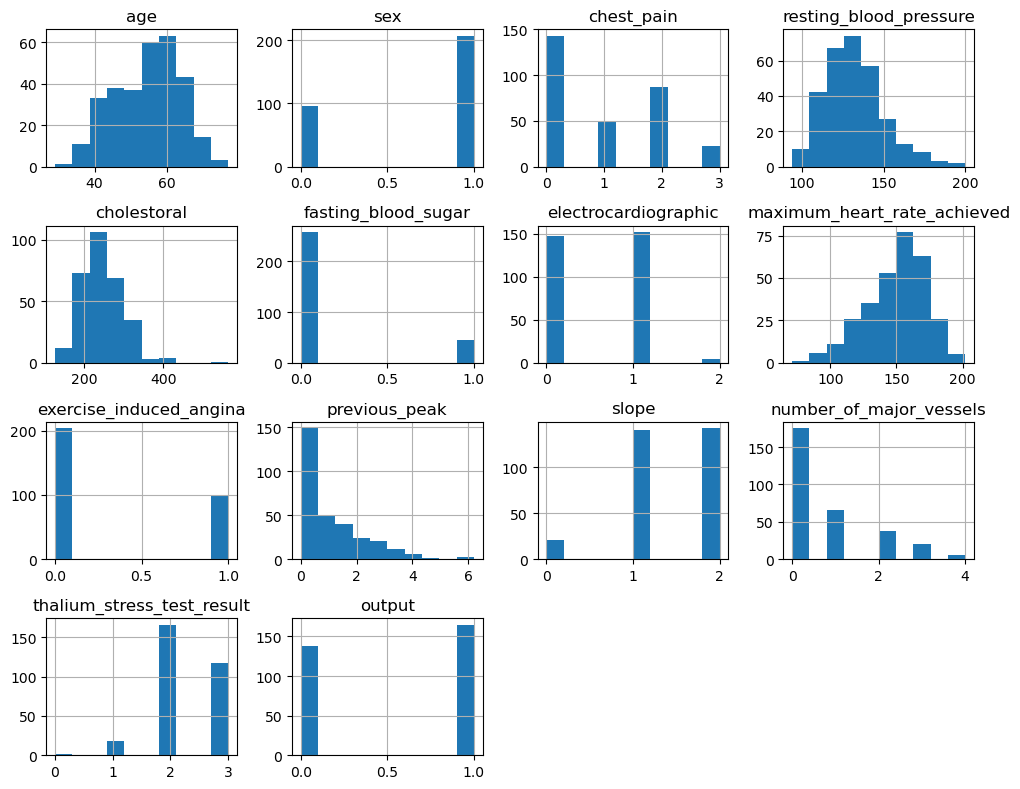

In [14]:
# Columns histograms
df.hist(figsize=(10,8))
plt.tight_layout()
plt.show()

In [15]:
# Label count
df['output'].value_counts()
# It is interesting to balance the data in the pre-processing step

1    165
0    138
Name: output, dtype: int64

In [17]:
# Generating a report from data in report.html using pandas-profiling
profile = ProfileReport(df, title="Report - heart_attack")
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Pre-Processing

In [18]:
# Selecting only the features
X = df.drop(columns='output')
# Data normalization
X_norm = StandardScaler().fit_transform(X)
# Selecting the labels
y = df['output']

In [19]:
# Balancing the data with random subsampling
X_res, y_res = RandomUnderSampler(random_state=RANDOM_STATE).fit_resample(X_norm, y)
# Converting NumPy Array to DataFrame
X_res = pd.DataFrame(X_res, columns=X.columns)

In [20]:
# Splitting the samples for training/validation and testing
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=RANDOM_STATE)

In [22]:
# Saving the modified dataset (after pre-processing)
X_res['output'] = y_res
X_res.to_csv('../Heart_Attack/heart_modified.csv', index=False)

In [24]:
# Saving datasets after splitting
X_train['output'] = y_train # training/validation
X_train.to_csv('../Heart_Attack/train_data.csv', index=False)
X_test['output'] = y_test # Test
X_test.to_csv('../Heart_Attack/test_data.csv', index=False)